In [185]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [186]:
train_data = pd.read_csv("vehicle_data.csv")#read the data from the source

In [187]:
train_data.sample(5)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
504791,2012,Nissan,Pathfinder,SV,suv,automatic,5n1ar1nb4cc616227,nv,37.0,64526.0,gray,black,first investors financial services,17000.0,17100.0,Fri Jun 05 2015 05:00:00 GMT-0700 (PDT)
318344,2012,Infiniti,G Coupe,G37,G Coupe,automatic,jn1cv6ek3cm420735,fl,35.0,42541.0,white,black,nissan infiniti lt,20500.0,21400.0,Thu Feb 19 2015 01:15:00 GMT-0800 (PST)
317950,2012,BMW,5 Series,535i,Sedan,automatic,wbafr7c51cc814626,ca,29.0,51497.0,gray,black,financial services remarketing (lease),31300.0,31000.0,Tue Feb 17 2015 04:30:00 GMT-0800 (PST)
51647,2013,Kia,Forte,EX,Hatchback,automatic,knafu5a25d5744453,nc,35.0,42176.0,gray,gray,avis corporation,9400.0,9700.0,Tue Dec 23 2014 09:15:00 GMT-0800 (PST)
95325,1995,Toyota,Tercel,DX,Sedan,automatic,jt2el56e0s0024887,ca,2.0,169987.0,silver,gray,charitable auto resource,575.0,500.0,Tue Jan 06 2015 13:00:00 GMT-0800 (PST)


In [188]:
# total size of the data
train_data.shape

(558837, 16)

There are total 558837 data available, with 16 attributes

In [189]:
duplicate_features_values = []
for col in train_data.columns:
    dct = {}
    dct[col] = train_data[col].nunique()
    dct[col+"values"] = train_data[col].unique()
    duplicate_features_values.append(dct)

In [190]:
duplicate_features_values[1]

{'make': 96,
 'makevalues': array(['Kia', 'BMW', 'Volvo', 'Nissan', 'Chevrolet', 'Audi', 'Ford',
        'Hyundai', 'Buick', 'Cadillac', 'Acura', 'Lexus', 'Infiniti',
        'Jeep', 'Mercedes-Benz', 'Mitsubishi', 'Mazda', 'MINI',
        'Land Rover', 'Lincoln', 'lincoln', 'Jaguar', 'Volkswagen',
        'Toyota', 'Subaru', 'Scion', 'Porsche', nan, 'bmw', 'Dodge',
        'FIAT', 'Chrysler', 'ford', 'Ferrari', 'Honda', 'GMC',
        'mitsubishi', 'Ram', 'smart', 'chevrolet', 'Bentley', 'chrysler',
        'pontiac', 'Pontiac', 'Saturn', 'Maserati', 'Mercury', 'HUMMER',
        'landrover', 'cadillac', 'land rover', 'mercedes', 'mazda',
        'toyota', 'lexus', 'gmc truck', 'honda', 'nissan', 'porsche',
        'Saab', 'Suzuki', 'dodge', 'subaru', 'Oldsmobile', 'oldsmobile',
        'hyundai', 'jeep', 'Isuzu', 'dodge tk', 'Geo', 'acura',
        'volkswagen', 'suzuki', 'kia', 'audi', 'Rolls-Royce', 'gmc',
        'maserati', 'mazda tk', 'mercury', 'buick', 'hyundai tk',
        'mer

In [191]:
duplicate_features_values[1]
train_data['make'] = train_data['make'].replace({'Nissan':"nissan","Kia":"kia","BMW":"bmw","Volvo":"volvo","Chevrolet":"chevrolet","Audi":"audi","Ford":"ford",
                                                "Hyundai":"hyundai","Buick":"buick","Lincoln":"lincoln","GMC":"gmc","Volkswagen":"volkswagen","Porsche":"porsche","Toyota":"toyota"})

In [192]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [193]:
#count the null values
train_data.isnull().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

very less ratio null values is available,
first we will try to drop the null values , then i will figure out loss of the data then as per return values  i will impute the null values.

In [194]:
train_copy = train_data.copy()


In [195]:
train_copy = train_data.dropna(axis=0)

In [196]:
train_copy.shape, train_data.shape

((472325, 16), (558837, 16))

after  the dorp all the rows with the null values, our records drop from 558837 to 472325, which    86512 records we have lost, we will go head with data shape.

In [197]:
train_copy.isnull().sum()

year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64

In [198]:
train_copy

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,bmw,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,bmw,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558831,2011,bmw,5 Series,528i,Sedan,automatic,wbafr1c53bc744672,fl,39.0,66403.0,white,brown,lauderdale imports ltd bmw pembrok pines,20300.0,22800.0,Tue Jul 07 2015 06:15:00 GMT-0700 (PDT)
558833,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200.0,30800.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558834,2012,bmw,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,48.0,50561.0,black,black,financial services remarketing (lease),29800.0,34000.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558835,2015,nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,38.0,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100.0,11100.0,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)


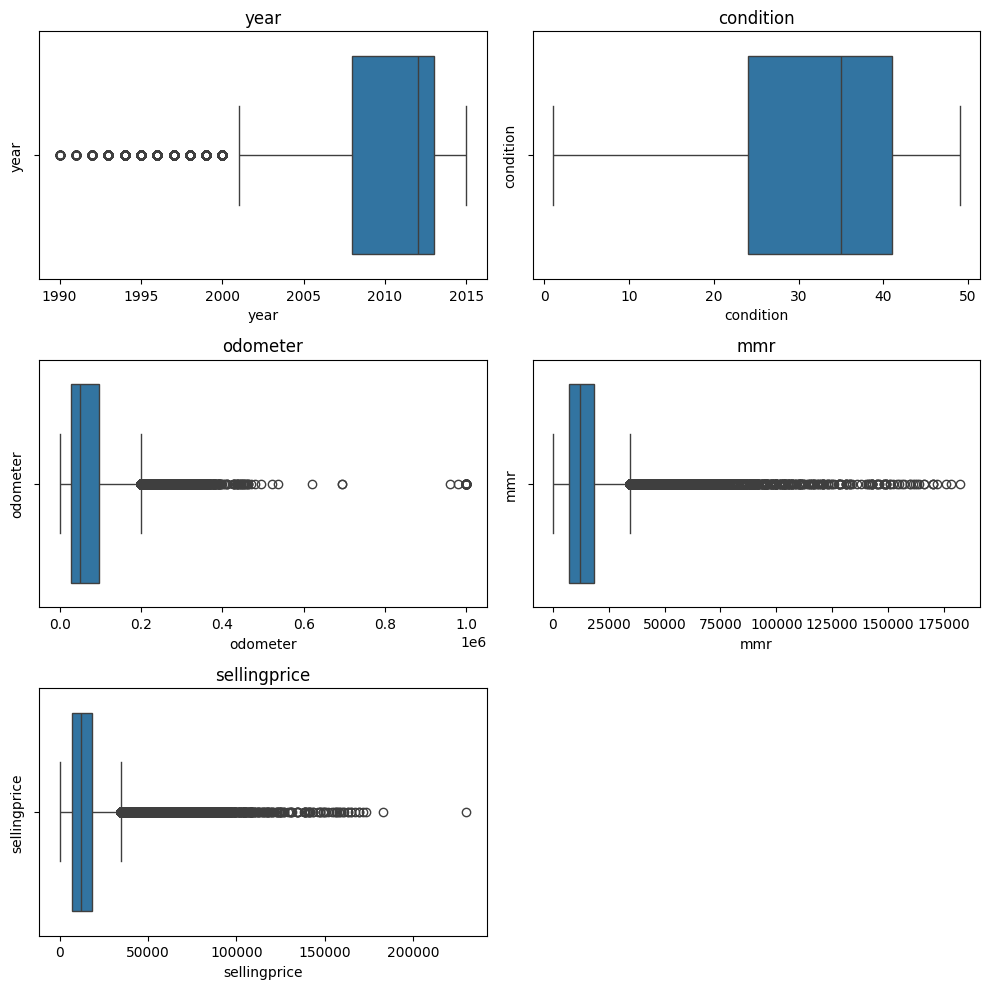

In [199]:
# plot the data
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Get the numeric columns
numeric_cols = train_copy.select_dtypes(include=[np.int64, np.float64]).columns

# Calculate the number of rows and columns needed for the subplots
num_cols = 2
num_rows = (len(numeric_cols) + num_cols - 1) // num_cols

# Create a figure and grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Plot each numeric column in a separate subplot
for i, col in enumerate(numeric_cols):
    ax = axes[i]
    sns.boxplot(data=train_copy, x=col, ax=ax)
    ax.set_title(col)
    ax.set_ylabel(col)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
    

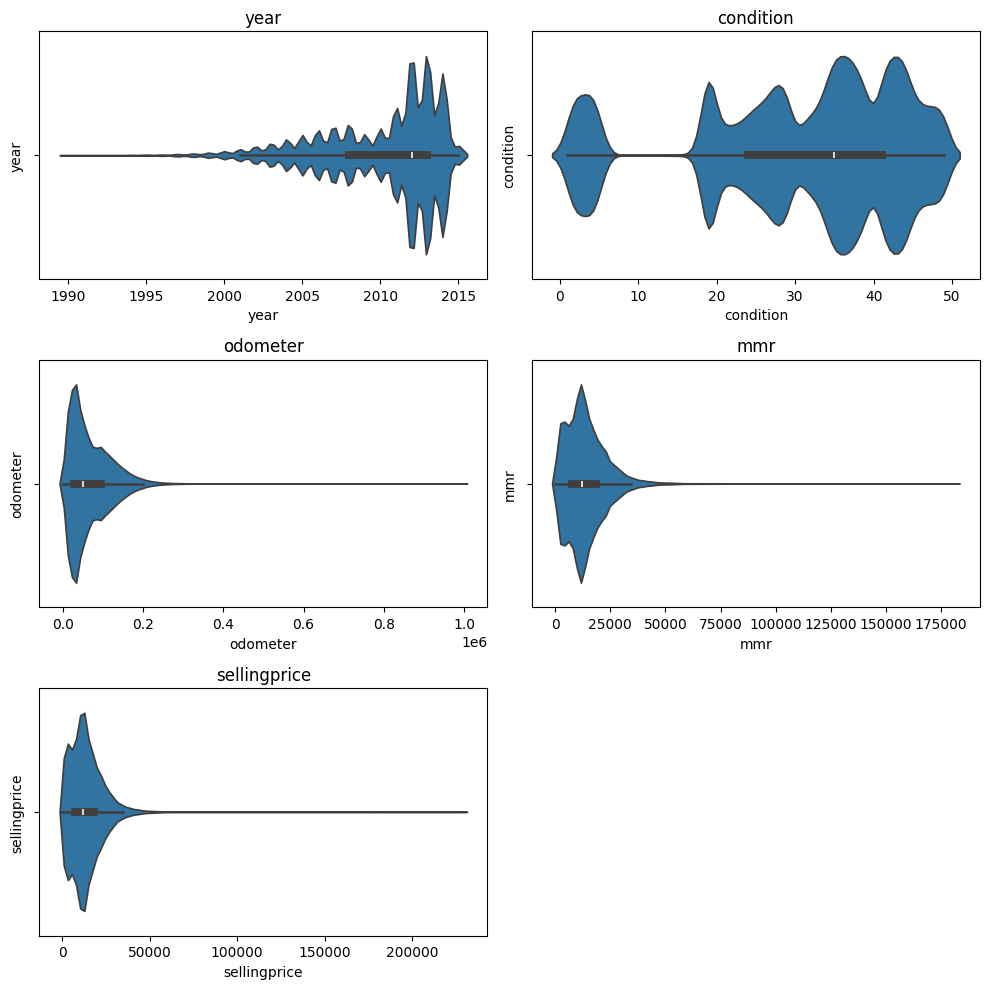

In [200]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Get the numeric columns
numeric_cols = train_copy.select_dtypes(include=[np.int64, np.float64]).columns

# Calculate the number of rows and columns needed for the subplots
num_cols = 2
num_rows = (len(numeric_cols) + num_cols - 1) // num_cols

# Create a figure and grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Plot each numeric column in a separate subplot
for i, col in enumerate(numeric_cols):
    ax = axes[i]
    sns.violinplot(data=train_copy, x=col, ax=ax)
    ax.set_title(col)
    ax.set_ylabel(col)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [201]:
#perform the transformatio and the plot the data again
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

features= train_copy.select_dtypes(include=[np.int64,np.float64]).drop(['sellingprice'], axis=1)
target = train_copy.select_dtypes(include=[np.int64,np.float64]).loc[:,"sellingprice"]

x_train,x_test,y_train,y_test = train_test_split(features, target, test_size=0.2, random_state=214)

In [256]:
x_train

,year,condition,odometer,mmr
288629,2006,44.0,116232.0,7650.0
537015,2012,44.0,21455.0,33700.0
357956,2013,46.0,23265.0,24600.0
253481,2006,27.0,121123.0,3875.0
84785,1997,21.0,190569.0,775.0
...,...,...,...,...
371181,2010,36.0,71888.0,18750.0
360201,2008,43.0,67302.0,6300.0
70529,2014,4.0,22351.0,12850.0
30712,2014,43.0,13251.0,16750.0


In [257]:
y_train

288629     6900.0
537015    30600.0
357956    24500.0
253481     4000.0
84785       400.0
           ...   
371181    19000.0
360201     7900.0
70529     12000.0
30712     16700.0
142014    14000.0
Name: sellingprice, Length: 377860, dtype: float64

In [202]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((377860, 4), (94465, 4), (377860,), (94465,))

In [203]:
randommodel = RandomForestRegressor()

In [204]:
randommodel.fit(x_train,y_train)

RandomForestRegressor()

In [205]:
predict = randommodel.predict(x_test)

In [206]:
from sklearn.metrics import mean_absolute_error

print("Mean Absolute error: ", mean_absolute_error(y_test,predict))

Mean Absolute error:  1010.9083088924343


In [207]:
# 2 scenario i will consider all the columns
train_copy

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,bmw,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,bmw,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558831,2011,bmw,5 Series,528i,Sedan,automatic,wbafr1c53bc744672,fl,39.0,66403.0,white,brown,lauderdale imports ltd bmw pembrok pines,20300.0,22800.0,Tue Jul 07 2015 06:15:00 GMT-0700 (PDT)
558833,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200.0,30800.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558834,2012,bmw,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,48.0,50561.0,black,black,financial services remarketing (lease),29800.0,34000.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558835,2015,nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,38.0,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100.0,11100.0,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)


In [208]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

for col in train_copy.select_dtypes(include=['object']).columns:
    train_copy[col] = encoder.fit_transform(train_copy[col])

C:\Users\banka\AppData\Local\Temp\ipykernel_89408\922578457.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_copy[col] = encoder.fit_transform(train_copy[col])
C:\Users\banka\AppData\Local\Temp\ipykernel_89408\922578457.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_copy[col] = encoder.fit_transform(train_copy[col])
C:\Users\banka\AppData\Local\Temp\ipykernel_89408\922578457.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

In [209]:
train_copy

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,45,637,818,35,0,342710,2,5.0,16639.0,17,1,5943,20500.0,21500.0,1675
1,2015,45,637,818,35,0,342704,2,5.0,9393.0,17,0,5943,20800.0,21500.0,1675
2,2014,39,10,253,36,0,430112,2,45.0,1331.0,7,1,4090,31900.0,30000.0,1085
3,2015,52,575,1212,36,0,462800,2,41.0,14282.0,17,1,11541,27500.0,27750.0,1176
4,2014,39,35,335,36,0,431048,2,43.0,2641.0,7,1,4090,66000.0,67000.0,743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558831,2011,39,27,316,36,0,433214,4,39.0,66403.0,17,3,6216,20300.0,22800.0,2051
558833,2012,30,8,926,11,0,246107,32,5.0,54393.0,17,1,5344,30200.0,30800.0,3167
558834,2012,39,722,1489,35,0,337968,2,48.0,50561.0,1,1,4090,29800.0,34000.0,3167
558835,2015,47,63,102,76,0,163249,5,38.0,16658.0,17,1,3788,15100.0,11100.0,1208


In [210]:
features2= train_copy.select_dtypes(include=[np.int64,np.float64]).drop(['sellingprice'], axis=1)
target2 = train_copy.select_dtypes(include=[np.int64,np.float64]).loc[:,"sellingprice"]

x_train1,x_test1,y_train1,y_test1 = train_test_split(features2, target2, test_size=0.2, random_state=214)

In [211]:
random2 = RandomForestRegressor()

In [212]:
random2.fit(x_train1,y_train1)

RandomForestRegressor()

In [ ]:
predict2 = random2.predict(x_test1)

In [213]:

print("Mean Absolute error: ", mean_absolute_error(y_test1,predict2))

Mean Absolute error:  1009.5622079127317


In [214]:
#3 use null and impute that
train_data3=train_data.copy()

In [215]:
train_data3

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,bmw,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,bmw,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558832,2015,kia,K900,Luxury,Sedan,NaN,knalw4d4xf6019304,in,45.0,18255.0,silver,black,avis corporation,35300.0,33000.0,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT)
558833,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200.0,30800.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558834,2012,bmw,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,48.0,50561.0,black,black,financial services remarketing (lease),29800.0,34000.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558835,2015,nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,38.0,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100.0,11100.0,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)


In [216]:
train_data3.isnull().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

In [217]:
train_data3['sellingprice'] = train_data3['sellingprice'].fillna(train_data3['sellingprice'].mean())


In [218]:
train_data3["sellingprice"].isnull().sum()

0

In [219]:
train_data3['transmission'].mode()

0    automatic
Name: transmission, dtype: object

In [220]:
train_data3['transmission'] = train_data3['transmission'].fillna(train_data3['transmission'].mode()[0])

In [221]:
train_data3["transmission"].isnull().sum()

0

In [222]:
train_data3['condition'].median()

35.0

In [223]:
train_data3['condition'] = train_data3['condition'].fillna(train_data3['condition'].median())

In [224]:
train_data3["condition"].isnull().sum()

0

In [226]:
train_data3['color'].mode()[0]

'black'

In [227]:
train_data3['color'] = train_data3['color'].fillna(train_data3['color'].mode()[0])

In [228]:
train_data3["color"].isnull().sum()

0

In [229]:
train_data3['interior'].mode()[0]

'black'

In [230]:
train_data3['interior'] = train_data3['interior'].fillna(train_data3['interior'].mode()[0])

In [231]:
train_data3["interior"].isnull().sum()

0

In [232]:
train_data3['odometer'].median()

52254.0

In [233]:
train_data3['odometer'] = train_data3['odometer'].fillna(train_data3['odometer'].median())

In [234]:
train_data3["odometer"].isnull().sum()

0

In [235]:
train_data3['mmr'].median()


12250.0

In [236]:
train_data3['mmr'] = train_data3['mmr'].fillna(train_data3['mmr'].median())

In [237]:
train_data3["mmr"].isnull().sum()

0

In [258]:
duplicate_features_values = []
for col in train_data3.columns:
    dct = {}
    dct[col] = train_data[col].nunique()
    dct[col+"values"] = train_data[col].unique()
    duplicate_features_values.append(dct)

In [259]:

train_data['make'] = train_data['make'].replace({'Nissan':"nissan","Kia":"kia","BMW":"bmw","Volvo":"volvo","Chevrolet":"chevrolet","Audi":"audi","Ford":"ford",
                                                "Hyundai":"hyundai","Buick":"buick","Lincoln":"lincoln","GMC":"gmc","Volkswagen":"volkswagen","Porsche":"porsche","Toyota":"toyota","Maserati":"maserati","Pontiac":"pontiac","Cadillac":"cadillac"
                                                ,"Mazda":"mazda","Dodge":"dodge","Lexus":"lexus","Land Rover":"land rover"})

In [260]:
duplicate_features_values[1]

{'make': 76,
 'makevalues': array(['kia', 'bmw', 'volvo', 'nissan', 'chevrolet', 'audi', 'ford',
        'hyundai', 'buick', 'cadillac', 'Acura', 'lexus', 'Infiniti',
        'Jeep', 'Mercedes-Benz', 'Mitsubishi', 'mazda', 'MINI',
        'land rover', 'lincoln', 'Jaguar', 'volkswagen', 'toyota',
        'Subaru', 'Scion', 'porsche', nan, 'dodge', 'FIAT', 'Chrysler',
        'Ferrari', 'Honda', 'gmc', 'mitsubishi', 'Ram', 'smart', 'Bentley',
        'chrysler', 'pontiac', 'Saturn', 'maserati', 'Mercury', 'HUMMER',
        'landrover', 'mercedes', 'gmc truck', 'honda', 'Saab', 'Suzuki',
        'subaru', 'Oldsmobile', 'oldsmobile', 'jeep', 'Isuzu', 'dodge tk',
        'Geo', 'acura', 'suzuki', 'Rolls-Royce', 'mazda tk', 'mercury',
        'hyundai tk', 'mercedes-b', 'vw', 'Daewoo', 'chev truck',
        'ford tk', 'plymouth', 'Plymouth', 'ford truck', 'Tesla',
        'airstream', 'dot', 'Aston Martin', 'Fisker', 'Lamborghini',
        'Lotus'], dtype=object)}

In [261]:
train_data3['make'] = train_data3['make'].fillna(train_data3['make'].mode()[0])

In [262]:
train_data3['model'] = train_data3['model'].fillna(train_data3['model'].mode()[0])

In [263]:
train_data3['trim'] = train_data3['trim'].fillna(train_data3['trim'].mode()[0])

In [244]:
train_data3['body'] = train_data3['body'].fillna(train_data3['body'].mode()[0])

In [264]:
train_data3['vin'] = train_data3['vin'].fillna(train_data3['vin'].mode()[0])

In [265]:
train_data3['saledate'] = train_data3['saledate'].fillna(train_data3['saledate'].mode()[0])

In [266]:
train_data3.isnull().sum()

year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64

In [248]:
train_copy.shape, train_data3.shape

((472325, 16), (558837, 16))

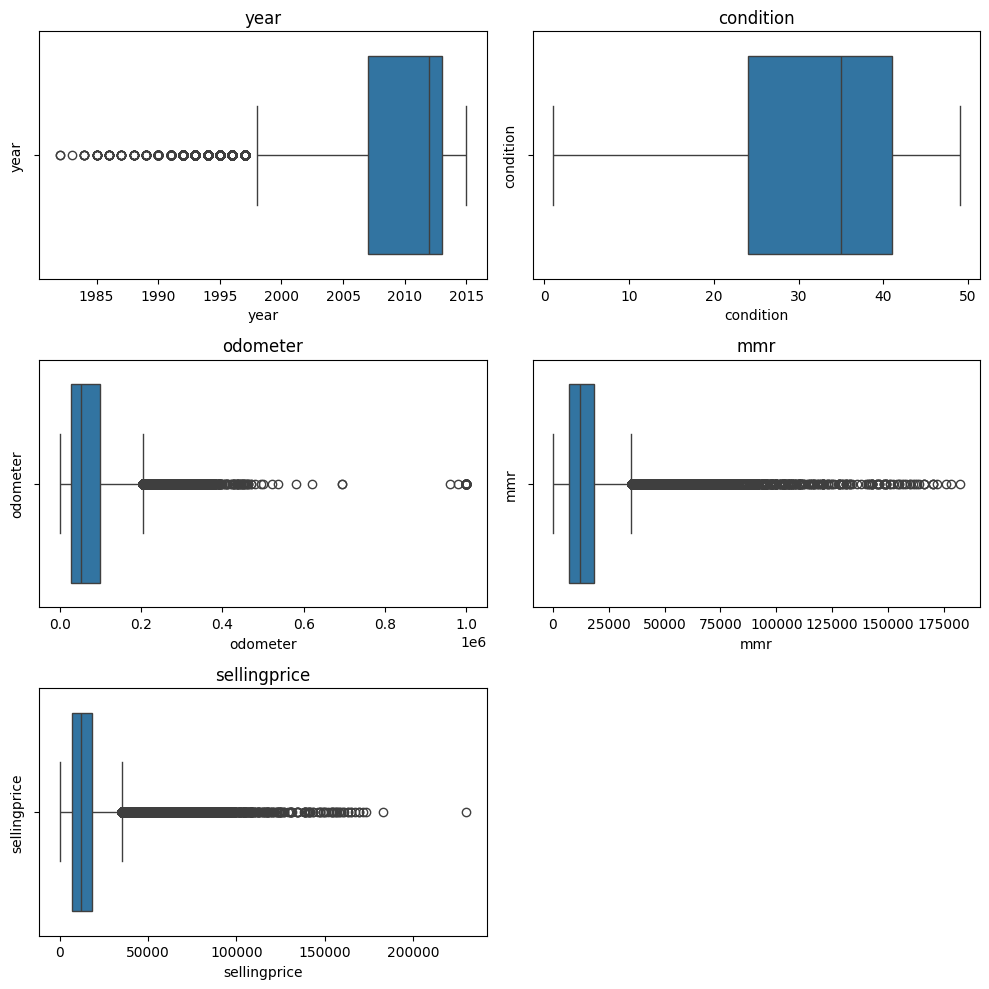

In [249]:
# plot the data
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Get the numeric columns
numeric_cols = train_data3.select_dtypes(include=[np.int64, np.float64]).columns

# Calculate the number of rows and columns needed for the subplots
num_cols = 2
num_rows = (len(numeric_cols) + num_cols - 1) // num_cols

# Create a figure and grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Plot each numeric column in a separate subplot
for i, col in enumerate(numeric_cols):
    ax = axes[i]
    sns.boxplot(data=train_data3, x=col, ax=ax)
    ax.set_title(col)
    ax.set_ylabel(col)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [250]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for col in train_data3.select_dtypes(include=['object']).columns:
    train_data3[col] = encoder.fit_transform(train_data3[col])

In [251]:
train_data3

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,59,658,998,36,1,403800,29,5.0,16639.0,43,1,7202,20500.0,21500.0,1775
1,2015,59,658,998,36,1,403792,29,5.0,9393.0,43,0,7202,20800.0,21500.0,1775
2,2014,41,11,283,37,1,507008,29,45.0,1331.0,33,1,4978,31900.0,30000.0,1163
3,2015,81,596,1399,37,1,546651,29,41.0,14282.0,43,1,13795,27500.0,27750.0,1258
4,2014,41,44,498,37,1,508041,29,43.0,2641.0,33,1,4978,66000.0,67000.0,817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558832,2015,59,388,1052,37,1,488920,35,45.0,18255.0,41,1,1536,35300.0,33000.0,1296
558833,2012,30,9,1109,11,1,289636,62,5.0,54393.0,43,1,6466,30200.0,30800.0,3311
558834,2012,41,743,1945,36,1,398254,29,48.0,50561.0,27,1,4978,29800.0,34000.0,3311
558835,2015,71,76,120,78,1,192494,32,38.0,16658.0,43,1,4606,15100.0,11100.0,1295


In [252]:
features3= train_data3.select_dtypes(include=[np.int64,np.float64]).drop(['sellingprice'], axis=1)
target3 = train_data3.select_dtypes(include=[np.int64,np.float64]).loc[:,"sellingprice"]

x_train3,x_test3,y_train3,y_test3 = train_test_split(features3, target3, test_size=0.2, random_state=214)

In [253]:
random3 = RandomForestRegressor()

In [254]:
random3.fit(x_train3,y_train3)

RandomForestRegressor()

In [ ]:
predict3 = random3.predict(x_test3)

In [255]:

print("Mean Absolute error: ", mean_absolute_error(y_test3,predict3))

Mean Absolute error:  1023.2884256680218


In [267]:
train_data4=train_data3.copy()

In [268]:
train_data4

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,59,658,998,36,1,403800,29,5.0,16639.0,43,1,7202,20500.0,21500.0,1775
1,2015,59,658,998,36,1,403792,29,5.0,9393.0,43,0,7202,20800.0,21500.0,1775
2,2014,41,11,283,37,1,507008,29,45.0,1331.0,33,1,4978,31900.0,30000.0,1163
3,2015,81,596,1399,37,1,546651,29,41.0,14282.0,43,1,13795,27500.0,27750.0,1258
4,2014,41,44,498,37,1,508041,29,43.0,2641.0,33,1,4978,66000.0,67000.0,817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558832,2015,59,388,1052,37,1,488920,35,45.0,18255.0,41,1,1536,35300.0,33000.0,1296
558833,2012,30,9,1109,11,1,289636,62,5.0,54393.0,43,1,6466,30200.0,30800.0,3311
558834,2012,41,743,1945,36,1,398254,29,48.0,50561.0,27,1,4978,29800.0,34000.0,3311
558835,2015,71,76,120,78,1,192494,32,38.0,16658.0,43,1,4606,15100.0,11100.0,1295


In [269]:
#df # i will for transformation and scaling
#perform log transform
for col in train_data4.select_dtypes(include=[np.int64, np.float64]).columns:
    train_data4[col] = np.log10(train_data4[col])

In [270]:
train_data4

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,3.304275,59,658,998,36,1,403800,29,0.698970,4.221127,43,1,7202,4.311754,4.332438,1775
1,3.304275,59,658,998,36,1,403792,29,0.698970,3.972804,43,0,7202,4.318063,4.332438,1775
2,3.304059,41,11,283,37,1,507008,29,1.653213,3.124178,33,1,4978,4.503791,4.477121,1163
3,3.304275,81,596,1399,37,1,546651,29,1.612784,4.154789,43,1,13795,4.439333,4.443263,1258
4,3.304059,41,44,498,37,1,508041,29,1.633468,3.421768,33,1,4978,4.819544,4.826075,817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558832,3.304275,59,388,1052,37,1,488920,35,1.653213,4.261382,41,1,1536,4.547775,4.518514,1296
558833,3.303628,30,9,1109,11,1,289636,62,0.698970,4.735543,43,1,6466,4.480007,4.488551,3311
558834,3.303628,41,743,1945,36,1,398254,29,1.681241,4.703816,27,1,4978,4.474216,4.531479,3311
558835,3.304275,71,76,120,78,1,192494,32,1.579784,4.221623,43,1,4606,4.178977,4.045323,1295


In [279]:
from sklearn.model_selection import train_test_split
features4= train_data4.select_dtypes(include=[np.int64,np.float64]).drop(['sellingprice'], axis=1)
target4 = train_data4.select_dtypes(include=[np.int64,np.float64]).loc[:,"sellingprice"]
X_train4, X_test4, y_train4, y_test4 = train_test_split(features4,target4,  test_size=0.2, random_state=4)
print ('training_data:', X_train4.shape,  y_train4.shape)
print ('testing_data:', X_test4.shape,  y_test4.shape)

training_data: (447069, 4) (447069,)
testing_data: (111768, 4) (111768,)


In [280]:
random4 = RandomForestRegressor()

In [281]:
random4.fit(X_train4,y_train4)

RandomForestRegressor()

In [282]:
predict4 = random4.predict(X_test4)

In [283]:
print("Mean Absolute error: ", mean_absolute_error(y_test4,predict4))

Mean Absolute error:  0.055535676512941744
